<a href="https://colab.research.google.com/github/toskpl/Challenge_DW/blob/master/part2/day5/cats_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
"""import bibliotek"""
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.preprocessing.image import ImageDataGenerator

import zlib
import zipfile
import os

import numpy as np
np.random.seed(2018)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

Using TensorFlow backend.


In [0]:
"""pobranie danych"""
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip  -O /tmp/cats_and_dogs_filtered.zip

--2020-02-27 19:07:14--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.128, 2404:6800:4003:c00::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   323MB/s    in 0.2s    

2020-02-27 19:07:14 (323 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
"""rozpakownie pobranego pliku"""
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ = zipfile.ZipFile(local_zip)
zip_.extractall(path='/tmp')
zip_.close()

In [0]:
"""katalogi  test i validation, """
base_dir = '/tmp/cats_and_dogs_filtered'

"""katalog  train"""
train_dir = os.path.join(base_dir,'train')
"""katalogi  cats i dogs"""
train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')

"""katalog  validation"""
validation_dir = os.path.join(base_dir,'validation')
"""katalogi  cats i dogs"""
validation_cats_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')






In [0]:
"""weryfikacji sciezki do katalogu validation_cats_dir"""
validation_cats_dir

'/tmp/cats_and_dogs_filtered/validation/cats'

In [0]:
""" podglad zwartosci"""
files = os.listdir(train_cats_dir)
files[0]
os.path.join(train_cats_dir,files[0])

'/tmp/cats_and_dogs_filtered/train/cats/cat.352.jpg'

In [0]:
files = os.listdir(train_dogs_dir)
files[0]
os.path.join(train_dogs_dir,files[0])

'/tmp/cats_and_dogs_filtered/train/dogs/dog.813.jpg'

In [0]:
all_cat_files = os.listdir(train_cats_dir)
cats_files = [os.path.join(train_cats_dir, file ) for file in all_cat_files][:25]

cats_files

['/tmp/cats_and_dogs_filtered/train/cats/cat.352.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.933.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.174.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.181.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.155.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.505.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.324.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.750.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.934.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.855.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.878.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.994.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.575.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.397.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.33.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.28.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.123.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.712.jpg',
 '/tmp/cats_

In [0]:
all_dogs_files = os.listdir(train_dogs_dir)
dogs_files = [os.path.join(train_dogs_dir, file ) for file in all_dogs_files][:25]

dogs_files

['/tmp/cats_and_dogs_filtered/train/dogs/dog.813.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.356.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.37.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.331.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.390.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.793.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.394.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.906.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.48.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.823.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.7.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.618.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.955.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.937.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.97.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.377.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.812.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.722.jpg',
 '/tmp/cats_and

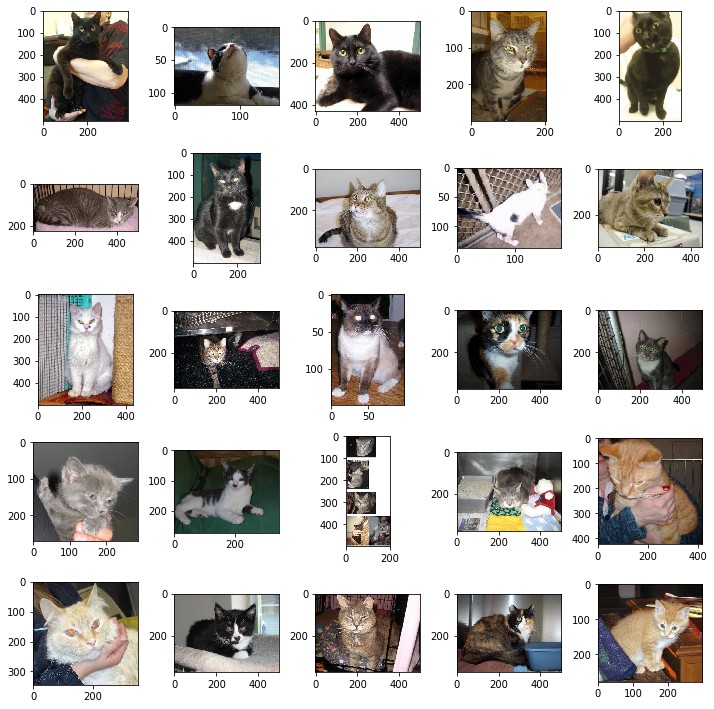

In [0]:
""" plt dla kotow """
plt.figure(figsize=(10,10))
for idx, img_path in enumerate(cats_files):
  plt.subplot(5,5,idx+1)
  
  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.tight_layout()

In [0]:
""" funkcja pomocnicza do plotu"""
def plot_images(item_dir,top=25):
  all_items_dir = os.listdir(item_dir)
  item_files = [os.path.join(item_dir, file ) for file in all_items_dir][:top]

  plt.figure(figsize=(10,10))
  for idx, img_path in enumerate(item_files):
    plt.subplot(5,5,idx+1)
  
    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.tight_layout()


<Figure size 432x288 with 0 Axes>

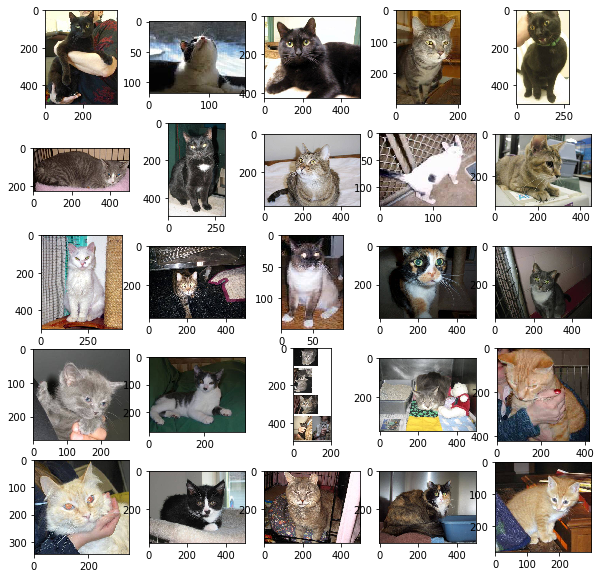

In [0]:
plot_images(train_cats_dir)

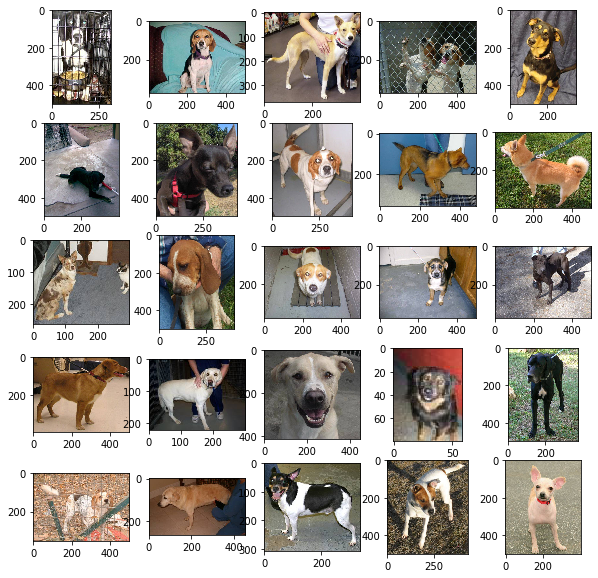

In [0]:
plot_images(train_dogs_dir)

In [0]:
"""architektura modelu"""
input_shape = (150,150,3)
model = Sequential([
    Conv2D(filters = 32, kernel_size= (3,3),input_shape = input_shape),
    MaxPool2D(pool_size = (2,2)),
    
    Conv2D(filters = 64, kernel_size= (3,3)),
    MaxPool2D(pool_size = (2,2)),
    
    Conv2D(filters = 128, kernel_size= (3,3)),
    MaxPool2D(pool_size = (2,2)),
    
    Flatten(),
    Dense(128,activation = 'relu'),
    
    Dropout(0.5),
    Dense(1,activation = 'sigmoid'),
    
])
model.compile(loss = 'binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 36992)            

In [0]:
#normaliacja
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [0]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode= 'binary'
)

validation_generator = train_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode= 'binary'
    
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Trenowanie


In [0]:

history = model.fit_generator(
    train_generator,
    steps_per_epoch =100,
    epochs =20,
    validation_data = validation_generator,
    validation_steps = 50,
    verbose=2
)

Epoch 1/20
 - 10s - loss: 0.9535 - acc: 0.5015 - val_loss: 0.6792 - val_acc: 0.5820
Epoch 2/20
 - 9s - loss: 0.6842 - acc: 0.5565 - val_loss: 0.6573 - val_acc: 0.6250
Epoch 3/20
 - 9s - loss: 0.6742 - acc: 0.5785 - val_loss: 0.6391 - val_acc: 0.6020
Epoch 4/20
 - 9s - loss: 0.6703 - acc: 0.5985 - val_loss: 0.6910 - val_acc: 0.5150
Epoch 5/20
 - 9s - loss: 0.6571 - acc: 0.5975 - val_loss: 0.6157 - val_acc: 0.6760
Epoch 6/20
 - 9s - loss: 0.6166 - acc: 0.6660 - val_loss: 0.6122 - val_acc: 0.6380
Epoch 7/20
 - 9s - loss: 0.6162 - acc: 0.6500 - val_loss: 0.5912 - val_acc: 0.6810
Epoch 8/20
 - 9s - loss: 0.5834 - acc: 0.6810 - val_loss: 0.5887 - val_acc: 0.6850
Epoch 9/20
 - 9s - loss: 0.5516 - acc: 0.7340 - val_loss: 0.5791 - val_acc: 0.6900
Epoch 10/20
 - 9s - loss: 0.5034 - acc: 0.7475 - val_loss: 0.5335 - val_acc: 0.7420
Epoch 11/20
 - 9s - loss: 0.4546 - acc: 0.7785 - val_loss: 0.5567 - val_acc: 0.7220
Epoch 12/20
 - 9s - loss: 0.3960 - acc: 0.8250 - val_loss: 0.5855 - val_acc: 0.7230
